('proportion : ', {0: 2892, 1: 2788, 2: 2813, 3: 2583})
('proportion : ', {0: 2892, 1: 2788, 2: 2813, 3: 2583})
('proportion : ', {0: 2892, 1: 2788, 2: 2813, 3: 2583})
('proportion : ', {0: 2892, 1: 2788, 2: 2813, 3: 2583})
#################### KMEANS ####################
data shape	nb clusters	nbepochs
--------------------------------------------------
(10000L, 1024L)	4		50
--------------------------------------------------
(1024L, 4L)
--------------------------------------------------
FINAL [4174 1414 1184 3228]
Elapse time: 30.33 s


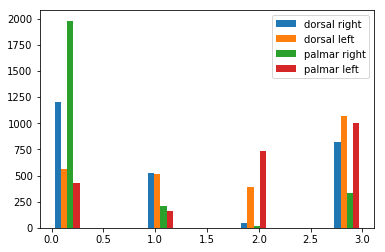

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt

"""## Chargement des données"""

def get_labels(file):
    origin = open(file,"r")
    classes = []
    choices = ['dorsal right', 'dorsal left', 'palmar right', 'palmar left']
    for idx, line in enumerate(origin):
        if idx == 0:
            continue
        else:
            try:
                id, age, gender, skinColor, accessories, nailPolish, aspectOfHand, imageName, irregularities = line.split(',')
                if aspectOfHand.lower().strip() in choices:
                    classes.append(choices.index(aspectOfHand))
            except Exception as e:
                print(e)
                continue
    unique, counts = np.unique(classes, return_counts=True)
    print('proportions : ', dict(zip(unique, counts)))
    return np.asarray(classes)

def load_hand_dataset(path, nbr_sample):
    filelist = os.listdir(path)
    x_train = np.array([np.array(Image.open(os.getcwd() + '\\Hands\\normalized_32\\' + fname))[:, :, 0] for fname in
                        filelist[:nbr_sample]], dtype=int)
    
    y_train = get_labels(os.getcwd()+ '\\HandInfo.txt')[:nbr_sample]
    dataset = np.array(np.array([x.flatten() for x in x_train]).T, dtype=int)
    return x_train, y_train, dataset


class PCA_custom(object):
    def __init__(self, t_dim, t_newDim, t_nbr_samples, mode):

        self.dim = t_dim
        self.new_dim = t_newDim
        self.nbr_sample = t_nbr_samples

        if mode == 'mnist':
            self.x_train, self.y_train, self.dataset = load_mnist_dataset(self.nbr_sample)

        if mode == 'hand':
            self.x_train, self.y_train, self.dataset = load_hand_dataset("Hands/normalized_32", self.nbr_sample)
        
        # process the covariance matrix
        self.cov_mat = np.cov(self.dataset)

        # get the eig values/vectors
        self.eig_val, self.eig_vec = np.linalg.eig(self.cov_mat)
        self.eig_val = np.real(self.eig_val)
        self.eig_vec = np.real(self.eig_vec)

        self.sorted_vectors = np.array([x[1] for x in sorted(zip(self.eig_val, self.eig_vec), key=lambda x: x[0])])

        # extract the "t_newDim" best eig values
        self.sorted_vectors = self.sorted_vectors[:t_newDim].T

        # transform the matrix
        self.transformed_dataset = np.dot(self.dataset.T, np.transpose(self.sorted_vectors).T)

        # decompress data
        self.decompressed = np.dot(self.transformed_dataset, self.sorted_vectors.T)


data = PCA_custom(32, 1024, 10000, mode='hand').decompressed
data = data.reshape(10000, 1024)
labels = get_labels(os.getcwd()+ '\\HandInfo.txt')[:data.shape[0]]

"""## Déclaration des parametres"""

# @title Parametres
epochs = 50  # @param {type:"integer"}
clusters = 4  # @param {type:"slider", min:0, max:20, step:1}

"""## Définition de la fonction Kmeans"""

def kmean(data, k, epochs, labels):   
    start_time = time.time()
    print("#" * 20 + " KMEANS " + "#" * 20)
    print("data shape\tnb clusters\tnbepochs")
    print("-" * 50)
    print("{}\t{}\t\t{}".format(data.shape, k, epochs))
    print("-" * 50)
    n = data.shape[0]
    nf = data.shape[1]
    rows = np.arange(n)
    c_idx = np.random.choice(n, k)
    centroids = data[c_idx].T
    print(centroids.shape)
    repeated_data = np.stack([data] * k, axis=-1)
    
    old_count = []
    continue_training = True
    i = 0
    
    while continue_training:
        local_time = time.time()
        distances = np.sqrt(np.sum(np.square(repeated_data - centroids), axis=1))
        assignments = np.argmin(distances, axis=-1)
        counts = np.bincount(assignments)
        concat_matx = np.zeros([n, k, nf])
        concat_matx[rows, assignments] = data
        centroids = concat_matx.sum(axis=0).T / counts.clip(min=1).T
#         print("iteration: {} {} -- t:{} s".format(i, counts, round(time.time() - local_time, 2)))
        if(i>=epochs or np.array_equal(old_count, counts)):
            continue_training = False
        old_count = counts
        i += 1
        
    print("-" * 50)
    print("FINAL {}".format(counts))
    print("Elapse time: {} s".format(round(time.time() - start_time, 2)))
    
    hist = list()
    for c in range(k):
        hist.append([])
    for i in range(len(labels)):
        hist[labels[i]].append(assignments[i])
    plt.hist(hist, label=['dorsal right', 'dorsal left', 'palmar right', 'palmar left'])
    plt.legend()
    plt.show()


"""## Déclaration des parametres"""
"""## 4 clusters, pca -> 1024"""
data = PCA_custom(32, 1024, 10000, mode='hand').decompressed
data = data.reshape(10000, 1024)
labels = get_labels(os.getcwd()+ '\\HandInfo.txt')[:data.shape[0]]
# @title Parametres
epochs = 50  # @param {type:"integer"}
clusters = 4  # @param {type:"slider", min:0, max:20, step:1}

kmean(data, clusters, epochs, labels)


#################### KMEANS ####################
data shape	nb clusters	nbepochs
--------------------------------------------------
(10000L, 1024L)	4		50
--------------------------------------------------
(1024L, 4L)
--------------------------------------------------
FINAL [2914 1133 3047 2906]
Elapse time: 48.32 s


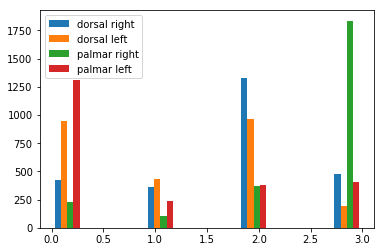

In [11]:
"""## 4 clusters, pca -> 512"""

data = PCA_custom(32, 512, 10000, mode='hand').decompressed
data = data.reshape(10000, 1024)
labels = get_labels(os.getcwd()+ '\\HandInfo.txt')[:data.shape[0]]
# @title Parametres
epochs = 50  # @param {type:"integer"}
clusters = 4  # @param {type:"slider", min:0, max:20, step:1}

kmean(data, clusters, epochs, labels)

#################### KMEANS ####################
data shape	nb clusters	nbepochs
--------------------------------------------------
(10000L, 1024L)	6		50
--------------------------------------------------
(1024L, 6L)
--------------------------------------------------
FINAL [2794 2022  736 1066 1279 2103]
Elapse time: 47.47 s


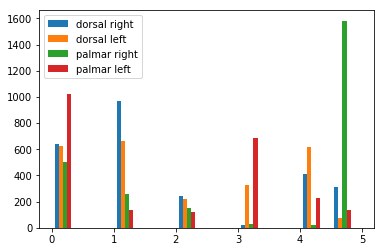

In [13]:
"""## 6 clusters, pca -> 512"""

data = PCA_custom(32, 512, 10000, mode='hand').decompressed
data = data.reshape(10000, 1024)
labels = get_labels(os.getcwd()+ '\\HandInfo.txt')[:data.shape[0]]
# @title Parametres
epochs = 50  # @param {type:"integer"}
clusters = 6  # @param {type:"slider", min:0, max:20, step:1}

kmean(data, clusters, epochs, labels)

#################### KMEANS ####################
data shape	nb clusters	nbepochs
--------------------------------------------------
(10000L, 1024L)	6		50
--------------------------------------------------
(1024L, 6L)
--------------------------------------------------
FINAL [1137 1327 2718  697 2088 2033]
Elapse time: 41.31 s


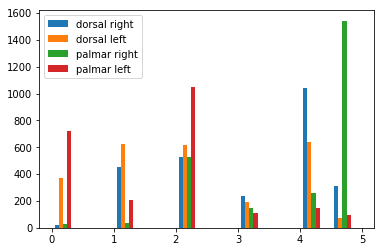

In [14]:
"""## 6 clusters, pca -> 1024"""

data = PCA_custom(32, 1024, 10000, mode='hand').decompressed
data = data.reshape(10000, 1024)
labels = get_labels(os.getcwd()+ '\\HandInfo.txt')[:data.shape[0]]
# @title Parametres
epochs = 50  # @param {type:"integer"}
clusters = 6  # @param {type:"slider", min:0, max:20, step:1}

kmean(data, clusters, epochs, labels)

#################### KMEANS ####################
data shape	nb clusters	nbepochs
--------------------------------------------------
(10000L, 1024L)	6		50
--------------------------------------------------
(1024L, 6L)
--------------------------------------------------
FINAL [2911 2205 1754 1217  574 1339]
Elapse time: 77.9 s


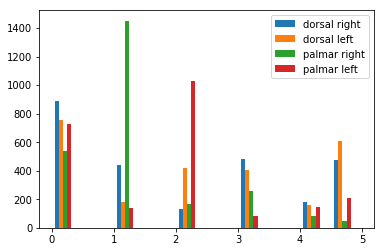

In [15]:
"""## 6 clusters, pca -> 128"""

data = PCA_custom(32, 128, 10000, mode='hand').decompressed
data = data.reshape(10000, 1024)
labels = get_labels(os.getcwd()+ '\\HandInfo.txt')[:data.shape[0]]
# @title Parametres
epochs = 50  # @param {type:"integer"}
clusters = 6  # @param {type:"slider", min:0, max:20, step:1}

kmean(data, clusters, epochs, labels)

#################### KMEANS ####################
data shape	nb clusters	nbepochs
--------------------------------------------------
(10000L, 1024L)	4		50
--------------------------------------------------
(1024L, 4L)
--------------------------------------------------
FINAL [2747 3311 2884 1058]
Elapse time: 55.33 s


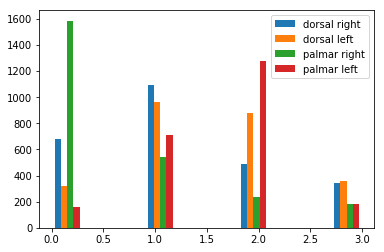

In [17]:
"""## 4 clusters, pca -> 128"""

data = PCA_custom(32, 128, 10000, mode='hand').decompressed
data = data.reshape(10000, 1024)
labels = get_labels(os.getcwd()+ '\\HandInfo.txt')[:data.shape[0]]
# @title Parametres
epochs = 50  # @param {type:"integer"}
clusters = 4  # @param {type:"slider", min:0, max:20, step:1}

kmean(data, clusters, epochs, labels)